In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
import pyspark

Creating Dataframe

In [3]:
data = pd.read_csv("Dataset\Dataset.csv")

data.head(10)


,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Set names to colums

In [4]:
# Manually set column names
column_names = ['age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income']

# Assign column names to the DataFrame
data.columns = column_names

# Display the updated DataFrame
data.head(10)


,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education_Num   48842 non-null  int64 
 5   Marital_Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital_Gain    48842 non-null  int64 
 11  Capital_Loss    48842 non-null  int64 
 12  Hours_per_Week  48842 non-null  int64 
 13  Native_Country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data

,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Discrete Variable Barplot

In [8]:
print(data.head())

   age          Workclass  fnlwgt   Education  Education_Num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0          2174             0              40   United-States   <=50

In [9]:
# Check for missing values in the dataset
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Values']

# Display missing data as a table
print(missing_data)

           Feature  Missing Values
0              age               0
1        Workclass               0
2           fnlwgt               0
3        Education               0
4    Education_Num               0
5   Marital_Status               0
6       Occupation               0
7     Relationship               0
8             Race               0
9              Sex               0
10    Capital_Gain               0
11    Capital_Loss               0
12  Hours_per_Week               0
13  Native_Country               0
14          Income               0


Min and Max Values

In [10]:
pd.Series(data.fnlwgt.unique()).sort_values()

13258      12285
28440      13492
19003      13769
26085      13862
18219      14878
          ...   
12306    1268339
13044    1366120
13898    1455435
11597    1484705
25230    1490400
Length: 28523, dtype: int64

In [11]:
pd.Series(data.Capital_Gain.unique()).sort_values()

1         0
80      114
61      401
19      594
60      914
      ...  
27    25236
48    27828
9     34095
90    41310
38    99999
Length: 123, dtype: int64

In [12]:
print(data.shape)

(48842, 15)


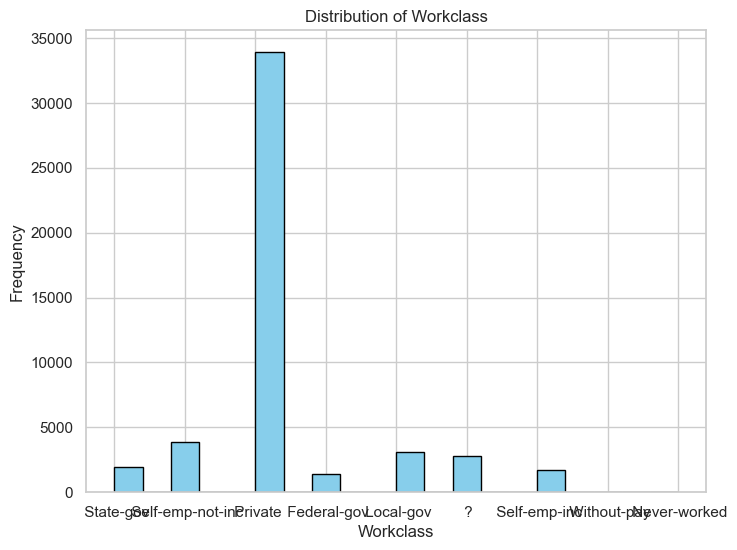

In [13]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'Workclass'  # You can change this to the column you want to visualize

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(data[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Data distributions

In [14]:
data['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [19]:
data['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: count, dtype: int64

Replace "?" with mode in workclass column

In [16]:
#Replace "?" with NaN
data['Workclass'].replace(' ?', np.nan, inplace=True)

#Calculate the mode of the "Workclass" column
mode_workclass = data['Workclass'].mode()[0]

#Replace missing values with the mode
data['Workclass'].fillna(mode_workclass, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4032\2415545028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Workclass'].replace(' ?', np.nan, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4032\2415545028.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [17]:
data['Workclass'].value_counts()

Workclass
Private             36706
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Remove "?" values in workclass and occupation columns

In [18]:
# Remove rows where "?" is located in both "Workclass" and "Occupation" columns
data = data[(data['Workclass'] != ' ?') & (data['Occupation'] != ' ?')]

In [19]:
data['Education'].value_counts()

Education
HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: count, dtype: int64

In [20]:
data['Marital_Status'].value_counts()

Marital_Status
Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: count, dtype: int64

In [21]:
data['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [22]:
data['Relationship'].value_counts()

Relationship
Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: count, dtype: int64

In [23]:
data['Race'].value_counts()

Race
White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: count, dtype: int64

In [21]:
data['Native_Country'].value_counts()

Native_Country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

Remove "?" in Native country column

In [20]:
data = data[(data['Native_Country'] != ' ?')]

In [26]:
data['Sex'].value_counts()

Sex
Male      30527
Female    14695
Name: count, dtype: int64

In [27]:
data['Income'].value_counts()

Income
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: count, dtype: int64

Replaced 4 values to 2 values in Income column

In [28]:
data['Income'] = data['Income'].str.replace(".", "")

In [29]:
data['Income'].value_counts()

Income
<=50K    34014
>50K     11208
Name: count, dtype: int64

In [30]:
data.head()

,age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Label Encoding NaN columns

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
data['le_workclass']=le.fit_transform(data['Workclass'])
data['le_education']=le.fit_transform(data['Education'])
data['le_marital_status']=le.fit_transform(data['Marital_Status'])
data['le_occupation']=le.fit_transform(data['Occupation'])
data['le_relationship']=le.fit_transform(data['Relationship'])
data['le_race']=le.fit_transform(data['Race'])
data['le_sex']=le.fit_transform(data['Sex'])
data['le_country']=le.fit_transform(data['Native_Country'])
data['le_income']=le.fit_transform(data['Income'])

In [34]:
data.describe()

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,le_workclass,le_education,le_marital_status,le_occupation,le_relationship,le_race,le_sex,le_country,le_income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45223.000000,45223.000000,45223.000000,45223.000000,45223.000000,45223.000000,45223.000000,45223.000000,45223.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,2.204498,10.313447,2.585277,5.969750,1.412799,3.680318,0.675077,36.401123,0.247883
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.958112,3.817065,1.500585,4.026532,1.597355,0.832367,0.468399,6.079827,0.431839
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,6.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,41.000000,2.000000


Adding filtered columns to new Dataframe

In [35]:
new=["age","fnlwgt","Education_Num","Capital_Gain","Capital_Loss","Hours_per_Week","le_workclass","le_education","le_marital_status","le_occupation","le_relationship","le_race","le_sex","le_country","le_income"]
data2=data[new]
data2

,age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,le_workclass,le_education,le_marital_status,le_occupation,le_relationship,le_race,le_sex,le_country,le_income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,5,9,4,0,1,4,1,38,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,4,9,2,3,0,4,1,38,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,2,11,0,5,1,4,1,38,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,2,1,2,5,0,2,1,38,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419.0,13.0,0.0,0.0,36.0,2,9,0,9,1,4,0,38,0
48839,38.0,374983.0,13.0,0.0,0.0,50.0,2,9,2,9,0,4,1,38,0
48840,44.0,83891.0,13.0,5455.0,0.0,40.0,2,9,0,0,3,1,1,38,0
48841,35.0,182148.0,13.0,0.0,0.0,60.0,3,9,2,3,0,4,1,38,1


Checking Corelations

In [36]:
correlation_matrix = data2.corr()
print(correlation_matrix)

                        age    fnlwgt  Education_Num  Capital_Gain  \
age                1.000000 -0.075792       0.037623      0.079683   
fnlwgt            -0.075792  1.000000      -0.041993     -0.004110   
Education_Num      0.037623 -0.041993       1.000000      0.126907   
Capital_Gain       0.079683 -0.004110       0.126907      1.000000   
Capital_Loss       0.059351 -0.004349       0.081711     -0.032102   
Hours_per_Week     0.101992 -0.018679       0.146206      0.083880   
le_workclass       0.085892 -0.034970       0.040779      0.034543   
le_education      -0.003511 -0.025318       0.347444      0.029889   
le_marital_status -0.271623  0.033096      -0.064986     -0.042399   
le_occupation     -0.004474 -0.002036       0.089686      0.019435   
le_relationship   -0.247564  0.009909      -0.088431     -0.056818   
le_race            0.023776 -0.029188       0.031655      0.014078   
le_sex             0.082053  0.027240       0.003417      0.047444   
le_country        -0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45223 entries, 0 to 48842
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45222 non-null  float64
 1   Workclass          45223 non-null  object 
 2   fnlwgt             45222 non-null  float64
 3   Education          45222 non-null  object 
 4   Education_Num      45222 non-null  float64
 5   Marital_Status     45222 non-null  object 
 6   Occupation         45222 non-null  object 
 7   Relationship       45222 non-null  object 
 8   Race               45222 non-null  object 
 9   Sex                45222 non-null  object 
 10  Capital_Gain       45222 non-null  float64
 11  Capital_Loss       45222 non-null  float64
 12  Hours_per_Week     45222 non-null  float64
 13  Native_Country     45222 non-null  object 
 14  Income             45222 non-null  object 
 15  le_workclass       45223 non-null  int32  
 16  le_education       45223 no

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45223 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45222 non-null  float64
 1   fnlwgt             45222 non-null  float64
 2   Education_Num      45222 non-null  float64
 3   Capital_Gain       45222 non-null  float64
 4   Capital_Loss       45222 non-null  float64
 5   Hours_per_Week     45222 non-null  float64
 6   le_workclass       45223 non-null  int32  
 7   le_education       45223 non-null  int32  
 8   le_marital_status  45223 non-null  int32  
 9   le_occupation      45223 non-null  int32  
 10  le_relationship    45223 non-null  int32  
 11  le_race            45223 non-null  int32  
 12  le_sex             45223 non-null  int32  
 13  le_country         45223 non-null  int32  
 14  le_income          45223 non-null  int32  
dtypes: float64(6), int32(9)
memory usage: 4.0 MB


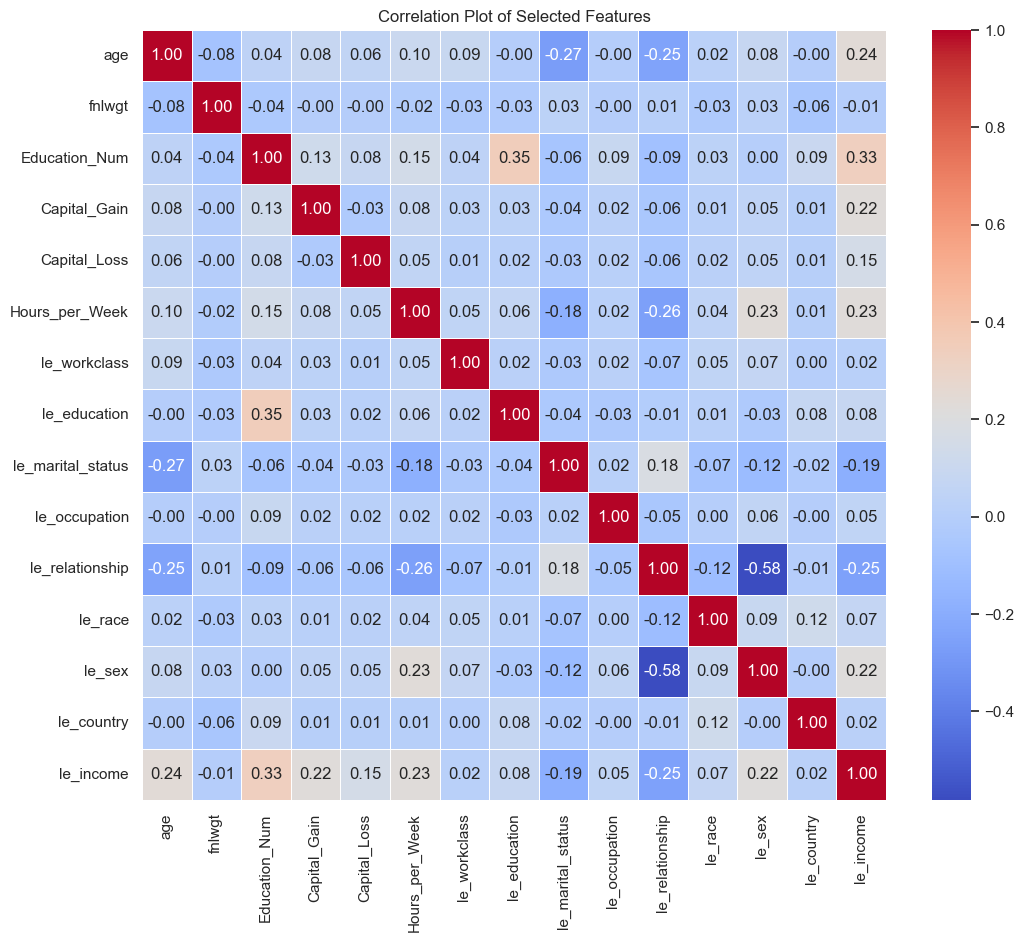

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot of Selected Features')
plt.show()

Calculate Correlation matrix of le_income column

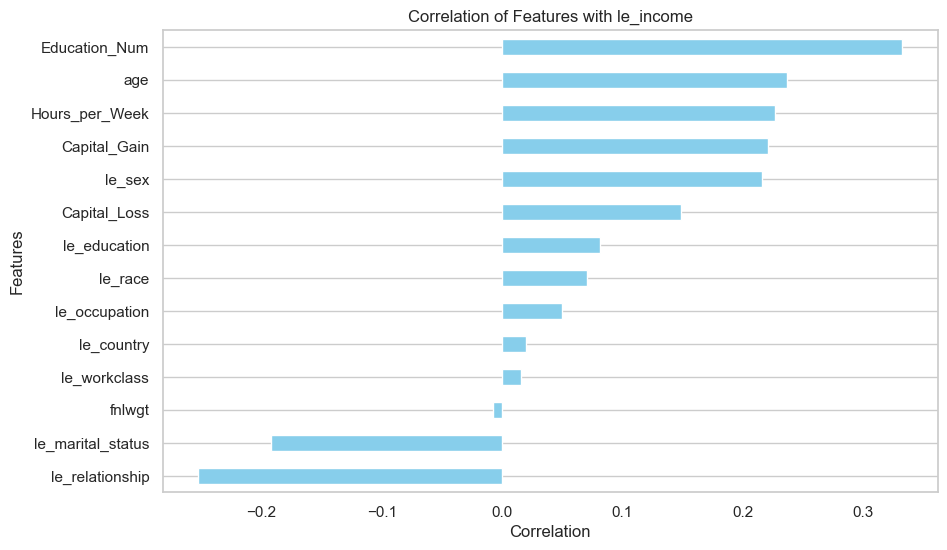

In [40]:
# Calculate correlation matrix
correlation_matrix = data2.corr()

# Extract correlation of le_income with other features
income_correlation = correlation_matrix['le_income'].drop('le_income')

# Plot
plt.figure(figsize=(10, 6))
income_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with le_income')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


Checking for outliers

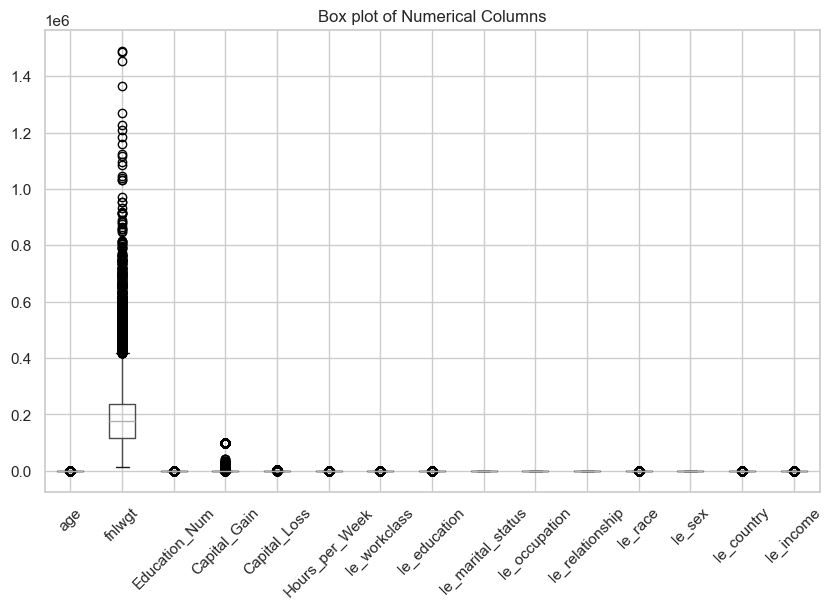

In [41]:
# Select numerical columns from the DataFrame
numerical_columns = data2.select_dtypes(include=['int', 'float']).columns

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box plot of Numerical Columns')
plt.show()


In [42]:
new_filtered=["age","le_workclass","le_education","Education_Num","le_occupation","le_race","le_sex","Capital_Gain","Capital_Loss","Hours_per_Week","le_country","le_income"]
data_final=data2[new_filtered]
data_final

,age,le_workclass,le_education,Education_Num,le_occupation,le_race,le_sex,Capital_Gain,Capital_Loss,Hours_per_Week,le_country,le_income
0,39.0,5,9,13.0,0,4,1,2174.0,0.0,40.0,38,0
1,50.0,4,9,13.0,3,4,1,0.0,0.0,13.0,38,0
2,38.0,2,11,9.0,5,4,1,0.0,0.0,40.0,38,0
3,53.0,2,1,7.0,5,2,1,0.0,0.0,40.0,38,0
4,28.0,2,9,13.0,9,2,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,2,9,13.0,9,4,0,0.0,0.0,36.0,38,0
48839,38.0,2,9,13.0,9,4,1,0.0,0.0,50.0,38,0
48840,44.0,2,9,13.0,0,1,1,5455.0,0.0,40.0,38,0
48841,35.0,3,9,13.0,3,4,1,0.0,0.0,60.0,38,1


Save a csv file for new Dataframe

In [43]:
#data_final.to_csv('preprocessed.csv', index=False)